In [4]:
import pandas as pd
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

In [7]:
df = pd.read_csv('../Renset data/history_w_videoinfo.csv', index_col=0).dropna(subset=['description'])

In [20]:
texts = df.loc[:, 'description'].astype('string') # take only the actual texts 
index = texts.index.values # getting the index so we can reference back to the original corpus! 

# split the texts into single words! 
texts = [text.split() for text in texts]



In [21]:
model = sbmtm()

model.make_graph(texts)

gt.seed_rng(42)
model.fit()

<NestedBlockState object, with base <BlockState object with 270568 blocks (1491 nonempty), degree-corrected, for graph <Graph object, undirected, with 270568 vertices and 2178608 edges, 2 internal vertex properties, 1 internal edge property, at 0x2a832fb50>, at 0x17bf11d50>, and 8 levels of sizes [(270568, 1491), (1491, 524), (524, 145), (145, 39), (39, 10), (10, 5), (5, 2), (2, 1)] at 0x296dd1990>


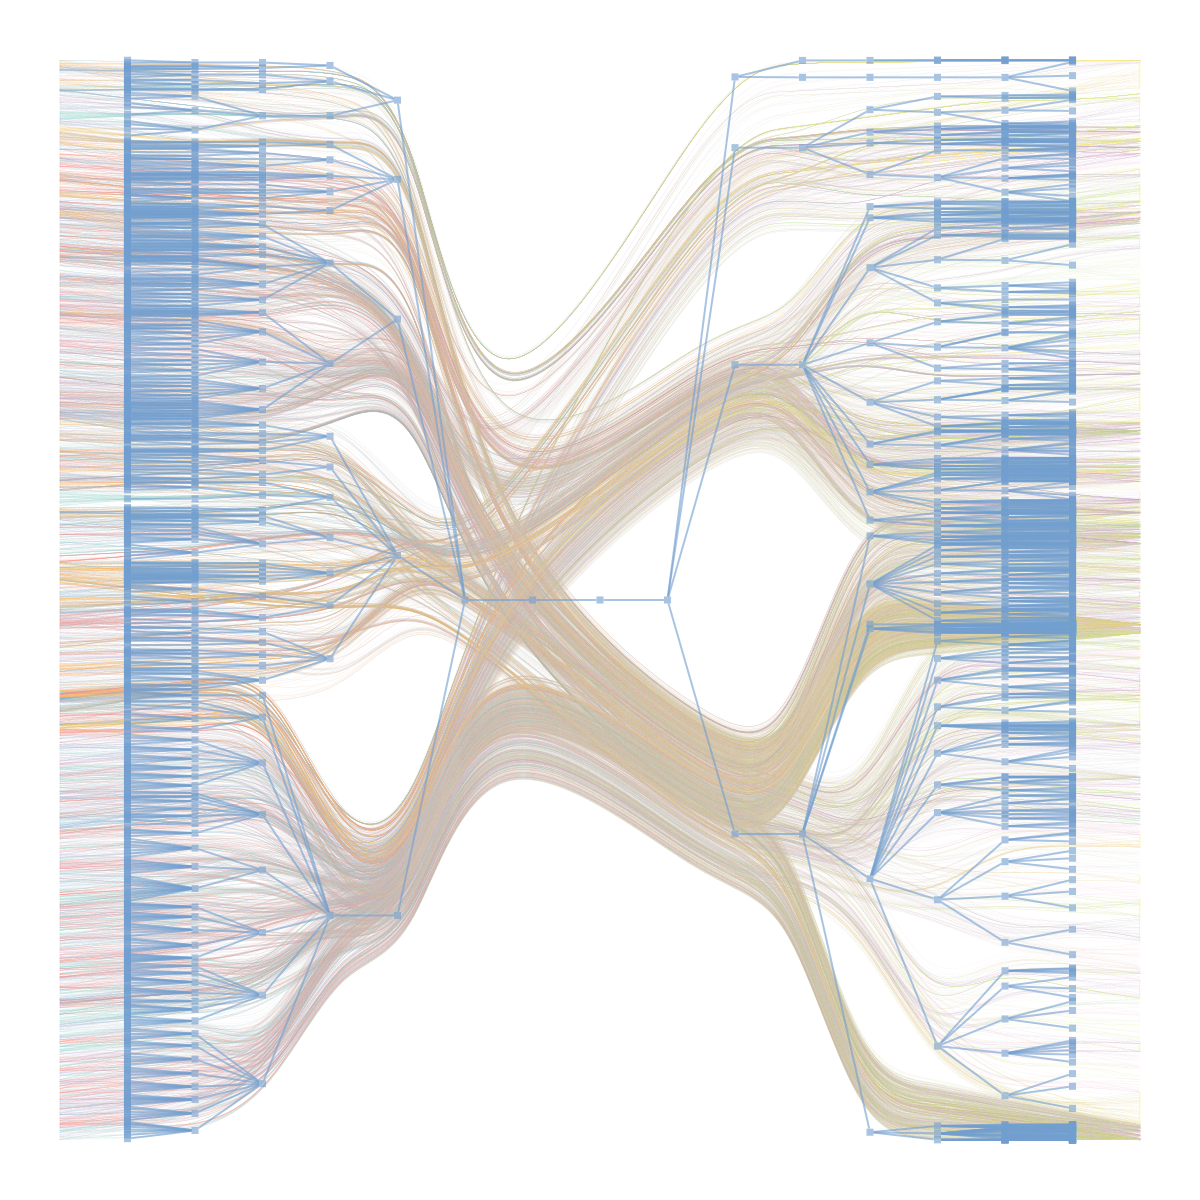

In [29]:
model.plot(nedges=10000)

In [33]:
topics = model.topics(l = 3, n = 10)

In [47]:
topics[18]

[('►', 0.11629934439949784),
 ('→', 0.04350327800251081),
 ('2018', 0.01813363091086623),
 ('hit', 0.016233086901938903),
 ('Outro', 0.013931510670944343),
 ('League', 0.012693541637606361),
 ('By', 0.012414562700516111),
 ('Spring', 0.011769423908494909),
 ('channel!', 0.010182731203794114),
 ('button', 0.010165295020225973)]

In [50]:
model.clusters(l=5, n=10)

{0: []}

In [51]:
model.save_model('model_w_uncleaned_data.pickle')